In [ ]:
# !pip install xgboost

In [15]:
import h2o
from h2o.estimators import H2OKMeansEstimator
from h2o.estimators import H2ORandomForestEstimator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,5 mins 01 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,3 months and 21 days !!!
H2O_cluster_name:,H2O_from_python_uba_p_2pd8df
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.513 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [16]:
transactions = h2o.import_file("creditcard.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
transactions.head(3)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0


In [18]:
transactions['Class'].table()

Class,Count
0,284315
1,492


In [ ]:
transactions.describe()
# no missing values

Text(0.5, 1.0, 'Heatmap of Correlation')

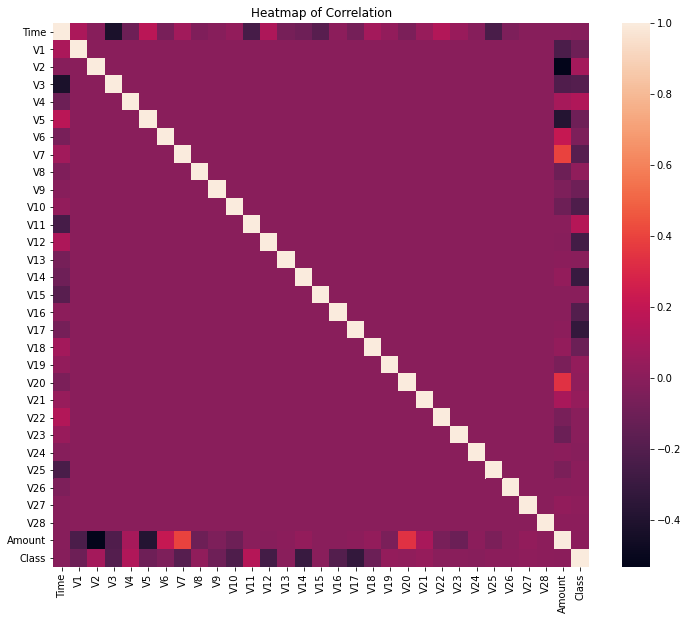

In [19]:
transactions_pd = pd.read_csv("creditcard.csv")

corr = transactions_pd.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [114]:
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


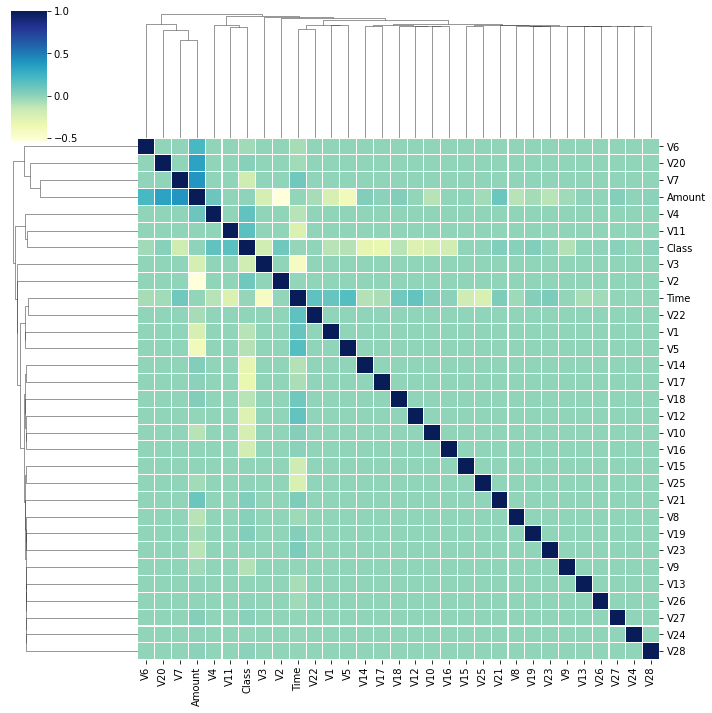

In [20]:
cg = sns.clustermap(corr, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
cg

In [21]:
X = transactions_pd.iloc[:, 1:30]
y = transactions_pd.iloc[:, 30:31].astype('category')

In [ ]:
# sns.pairplot(X)

In [12]:
X.describe

<bound method NDFrame.describe of                V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698

In [13]:
############# FEATURE IMPORTANCE ############

In [125]:
sum(importance)

1.0000000000000002

In [121]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


<ipython-input-121-b7350919e6d3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


Feature: 0, Score: 0.01557
Feature: 1, Score: 0.01365
Feature: 2, Score: 0.02292
Feature: 3, Score: 0.03165
Feature: 4, Score: 0.01172
Feature: 5, Score: 0.01773
Feature: 6, Score: 0.02662
Feature: 7, Score: 0.01213
Feature: 8, Score: 0.03703
Feature: 9, Score: 0.09415
Feature: 10, Score: 0.06203
Feature: 11, Score: 0.09785
Feature: 12, Score: 0.01061
Feature: 13, Score: 0.11159
Feature: 14, Score: 0.01194
Feature: 15, Score: 0.06769
Feature: 16, Score: 0.19644
Feature: 17, Score: 0.02418
Feature: 18, Score: 0.01217
Feature: 19, Score: 0.01346
Feature: 20, Score: 0.01685
Feature: 21, Score: 0.00929
Feature: 22, Score: 0.00720
Feature: 23, Score: 0.01028
Feature: 24, Score: 0.00921
Feature: 25, Score: 0.02006
Feature: 26, Score: 0.01199
Feature: 27, Score: 0.01051
Feature: 28, Score: 0.01351


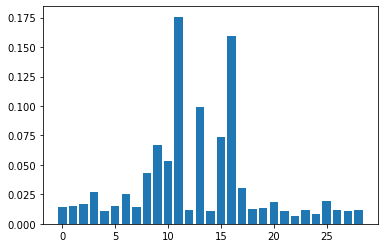

In [23]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [30]:
aux_dict

{'V1': 0.01451054584913956,
 'V2': 0.015178843629414856,
 'V3': 0.016630903347000667,
 'V4': 0.027317249265994367,
 'V5': 0.010910260556993363,
 'V6': 0.014751904405809738,
 'V7': 0.02551200457998041,
 'V8': 0.014433817832122239,
 'V9': 0.04309615391923299,
 'V10': 0.06711452495786861,
 'V11': 0.0536404663722935,
 'V12': 0.1757759259099156,
 'V13': 0.011415918020249875,
 'V14': 0.09900325674815634,
 'V15': 0.010981046296306583,
 'V16': 0.07408072531744905,
 'V17': 0.15937132958749198,
 'V18': 0.030374303782305694,
 'V19': 0.0127777453658715,
 'V20': 0.013602678872523461,
 'V21': 0.018500395841318993,
 'V22': 0.010702469325240497,
 'V23': 0.00701063741166497,
 'V24': 0.011610129551301184,
 'V25': 0.008112407692912816,
 'V26': 0.01954992557510665,
 'V27': 0.011729811614436097,
 'V28': 0.010805795432932653,
 'Amount': 0.01149882293896592}

In [32]:
# sorting importance
import numpy as np
import operator

aux_dict = dict(zip(X.columns,importance))
# sorted(importance_dict.values())

importance_sorted = dict(sorted(aux_dict.items(), key=operator.itemgetter(1), reverse = True))
importance_sorted

{'V12': 0.1757759259099156,
 'V17': 0.15937132958749198,
 'V14': 0.09900325674815634,
 'V16': 0.07408072531744905,
 'V10': 0.06711452495786861,
 'V11': 0.0536404663722935,
 'V9': 0.04309615391923299,
 'V18': 0.030374303782305694,
 'V4': 0.027317249265994367,
 'V7': 0.02551200457998041,
 'V26': 0.01954992557510665,
 'V21': 0.018500395841318993,
 'V3': 0.016630903347000667,
 'V2': 0.015178843629414856,
 'V6': 0.014751904405809738,
 'V1': 0.01451054584913956,
 'V8': 0.014433817832122239,
 'V20': 0.013602678872523461,
 'V19': 0.0127777453658715,
 'V27': 0.011729811614436097,
 'V24': 0.011610129551301184,
 'Amount': 0.01149882293896592,
 'V13': 0.011415918020249875,
 'V15': 0.010981046296306583,
 'V5': 0.010910260556993363,
 'V28': 0.010805795432932653,
 'V22': 0.010702469325240497,
 'V25': 0.008112407692912816,
 'V23': 0.00701063741166497}

([<matplotlib.axis.XTick at 0x274a310edc0>,
 [Text(0, 0, 'V12'),
  Text(1, 0, 'V17'),
  Text(2, 0, 'V14'),
  Text(3, 0, 'V16'),
  Text(4, 0, 'V10'),
  Text(5, 0, 'V11'),
  Text(6, 0, 'V9'),
  Text(7, 0, 'V18'),
  Text(8, 0, 'V4'),
  Text(9, 0, 'V7'),
  Text(10, 0, 'V26'),
  Text(11, 0, 'V21'),
  Text(12, 0, 'V3'),
  Text(13, 0, 'V2'),
  Text(14, 0, 'V6'),
  Text(15, 0, 'V1'),
  Text(16, 0, 'V8'),
  Text(17, 0, 'V20'),
  Text(18, 0, 'V19'),
  Text(19, 0, 'V27'),
  Text(20, 0, 'V24'),
  Text(21, 0, 'Amount'),
  Text(22, 0, 'V13'),
  Text(23, 0, 'V15'),
  Text(24, 0, 'V5'),
  Text(25, 0, 'V28'),
  Text(26, 0, 'V22'),
  Text(27, 0, 'V25'),
  Text(28, 0, 'V23')])

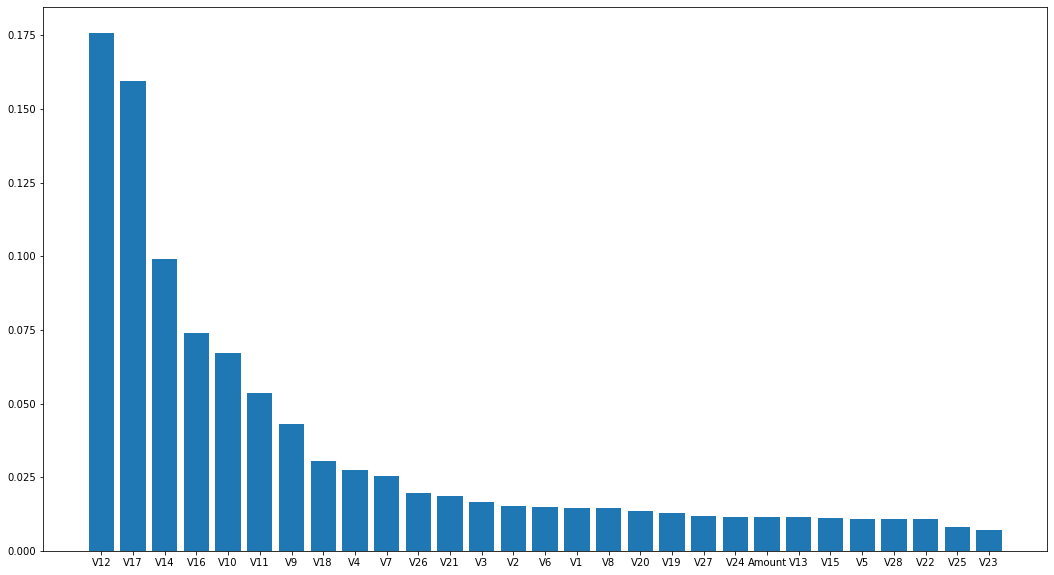

In [33]:
# plotting sorted importance
plt.figure(figsize=(18,10))
plt.bar(range(len(importance_sorted)), list(importance_sorted.values()), align='center')
plt.xticks(range(len(importance_sorted)), list(importance_sorted.keys()))

In [77]:
X[good_cols]

,V12,V17,V14,V16
0,-0.617801,0.207971,-0.311169,-0.470401
1,1.065235,-0.114805,-0.143772,0.463917
2,0.066084,1.109969,-0.165946,-2.890083
3,0.178228,-0.684093,-0.287924,-1.059647
4,0.538196,-0.237033,-1.119670,-0.451449
...,...,...,...,...
284802,2.711941,1.991691,4.626942,1.107641
284803,0.915802,-0.025693,-0.675143,-0.711757
284804,0.063119,0.313502,-0.510602,0.140716
284805,-0.962886,0.509928,0.449624,-0.608577


0.628986228893175

In [127]:
# feature selections
threshold = 0.05
good_cols = []
importances = []

for col_name, importance in importance_sorted.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if importance > threshold:
        good_cols.append(col_name)
        importances.append(importance)
good_cols

['V12', 'V17', 'V14', 'V16', 'V10', 'V11']

In [ ]:
# acumulative importances
sum(importances)

In [ ]:
############# RF ############

In [ ]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
############# XGBOOST ############

In [36]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [105]:
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X[good_cols], y, test_size=test_size, random_state=seed)

In [106]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\uba_p\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\uba_p\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [108]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\uba_p\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [109]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [110]:
from collections import Counter

In [111]:
Counter(predictions).values() # counts the elements' frequency of predictions

dict_values([71096, 106])

In [112]:
Counter(y_test.values.squeeze()).values() # counts the elements frequency of y_test part

dict_values([71076, 126])

In [113]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
#print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print('The Accuracy on Test Set is: ', predict_accuracy_on_test_set)

[[71068     8]
 [   28    98]]
The Accuracy on Test Set is:  0.9994943962248252
